***Initial Setup***

In [56]:
# importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [57]:
# loading data

data = pd.read_csv('./datasets/car.data', header=None, names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
data['label'] = data['class'].replace({'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3})
data

,buying,maint,doors,persons,lug_boot,safety,class,label
0,vhigh,vhigh,2,2,small,low,unacc,0
1,vhigh,vhigh,2,2,small,med,unacc,0
2,vhigh,vhigh,2,2,small,high,unacc,0
3,vhigh,vhigh,2,2,med,low,unacc,0
4,vhigh,vhigh,2,2,med,med,unacc,0
...,...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good,2
1724,low,low,5more,more,med,high,vgood,3
1725,low,low,5more,more,big,low,unacc,0
1726,low,low,5more,more,big,med,good,2


***Inspecting data***

In [58]:
print(data.info(), '\n', data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
 7   label     1728 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 108.1+ KB
None 
              label
count  1728.000000
mean      0.414931
std       0.740700
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       3.000000


<AxesSubplot:xlabel='class', ylabel='count'>

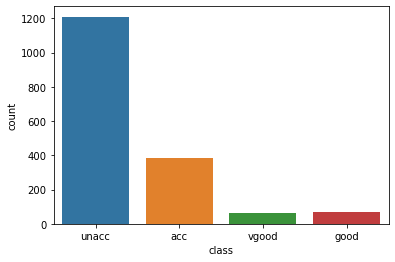

In [59]:
sns.countplot(data['class'],label="Count")

In [71]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

***Feature Engineering***

In [60]:
# one-hot encoding on the features

dummy_data = pd.get_dummies(data.drop(['class', 'label'], axis=1))

In [61]:
# defining X and y

X = np.array(dummy_data)
y = np.array(data['label'])

In [62]:
# train-test splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Models***

In [63]:
# initializing and running Decision Tree model with default parameters

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f'Training score: {clf.score(X_train, y_train)}')
print(f'Testing score:  {clf.score(X_test, y_test)}')

Training score: 1.0
Testing score:  0.9566473988439307


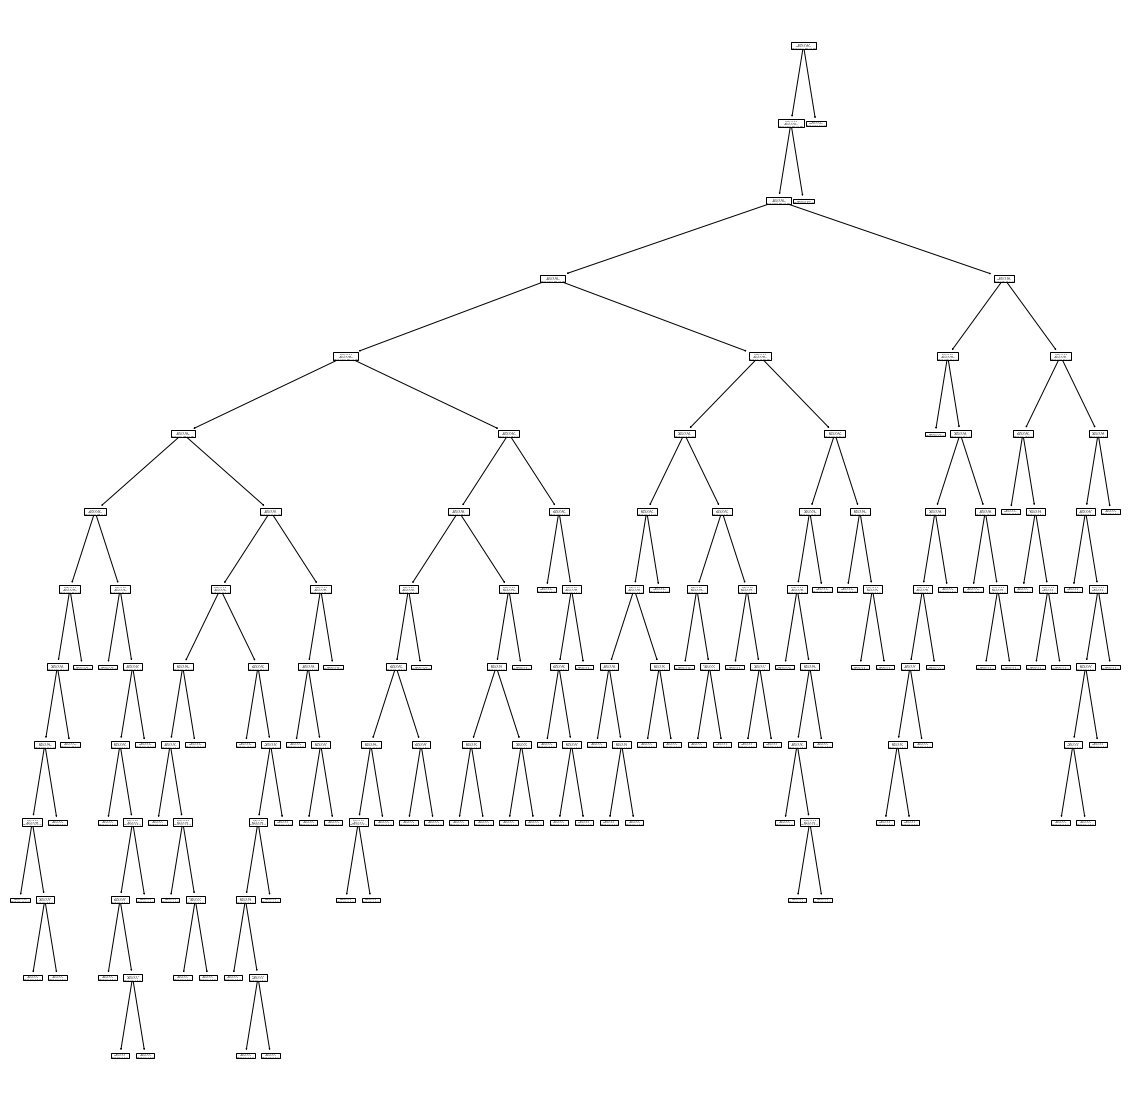

In [68]:
plt.figure(figsize=(20, 20))
tree.plot_tree(clf)
plt.show()

In [69]:
# playing with RandomizedSearchCV to find best parameters for Decision Tree

param = {'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': ['None', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_split': [2, 3, 4],
        'random_state': [42, 0, 13]}

trees = DecisionTreeClassifier()

tree_random = RandomizedSearchCV(trees, param)

tree_random.fit(X_train, y_train)

print(f"Best Decision Tree Parameters: {tree_random.best_params_}")
print(f"Best score is {tree_random.best_score_}")

Best Decision Tree Parameters: {'splitter': 'random', 'random_state': 13, 'min_samples_split': 3, 'max_depth': 8, 'criterion': 'entropy'}
Best score is 0.9269083869617537


In [51]:
# initializing and running Random Forest with default parameters

rfc = RandomForestClassifier(random_state=42).fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(f'Training score: {clf.score(X_train, y_train)}')
print(f'Testing score:  {clf.score(X_test, y_test)}')

Training score: 1.0
Testing score:  0.9566473988439307


In [70]:
# playing with RandomizedSearchCV to find best parameters for Random Forest

param = {'n_estimators' : [100, 200, 300, 400, 500],
        'criterion': ['gini', 'entropy'],
        'max_depth': ['None', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_split': [2, 3, 4],
        'bootstrap': ['True', 'False'],
        'random_state': [42, 0, 13]}

forest = RandomForestClassifier()

forest_random = RandomizedSearchCV(forest, param)

forest_random.fit(X_train, y_train)

print(f"Best Random Forest Parameters: {forest_random.best_params_}")
print(f"Best score is {forest_random.best_score_}")

Best Random Forest Parameters: {'random_state': 13, 'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 9, 'criterion': 'entropy', 'bootstrap': 'True'}
Best score is 0.9558598859415058
